In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path = os.listdir('drive/MyDrive/ALL_IDB/ALL_IDB2/img')
classes = {'healthy':0, 'ALL':1}

In [ ]:
print(path)

['Im134_0.tif', 'Im131_0.tif', 'Im136_0.tif', 'Im132_0.tif', 'Im133_0.tif', 'Im135_0.tif', 'Im143_0.tif', 'Im139_0.tif', 'Im149_0.tif', 'Im145_0.tif', 'Im148_0.tif', 'Im137_0.tif', 'Im138_0.tif', 'Im146_0.tif', 'Im141_0.tif', 'Im142_0.tif', 'Im140_0.tif', 'Im144_0.tif', 'Im147_0.tif', 'Im150_0.tif', 'Im151_0.tif', 'Im153_0.tif', 'Im152_0.tif', 'Im154_0.tif', 'Im155_0.tif', 'Im157_0.tif', 'Im161_0.tif', 'Im164_0.tif', 'Im168_0.tif', 'Im166_0.tif', 'Im162_0.tif', 'Im167_0.tif', 'Im158_0.tif', 'Im156_0.tif', 'Im163_0.tif', 'Im160_0.tif', 'Im165_0.tif', 'Im159_0.tif', 'Im181_0.tif', 'Im171_0.tif', 'Im176_0.tif', 'Im184_0.tif', 'Im179_0.tif', 'Im192_0.tif', 'Im189_0.tif', 'Im187_0.tif', 'Im178_0.tif', 'Im174_0.tif', 'Im182_0.tif', 'Im183_0.tif', 'Im170_0.tif', 'Im172_0.tif', 'Im190_0.tif', 'Im173_0.tif', 'Im185_0.tif', 'Im186_0.tif', 'Im188_0.tif', 'Im193_0.tif', 'Im169_0.tif', 'Im175_0.tif', 'Im177_0.tif', 'Im180_0.tif', 'Im191_0.tif', 'Im195_0.tif', 'Im194_0.tif', 'Im213_0.tif', 'Im214_0.

In [ ]:
import cv2
X = []
Y = []
for cls in classes :
    pth = 'drive/MyDrive/ALL_IDB/ALL_IDB2/img/'+cls
    for j in os.listdir(pth) :
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
pd.Series(Y).value_counts()

0    130
1    130
dtype: int64

In [ ]:
X.shape

(260, 200, 200)

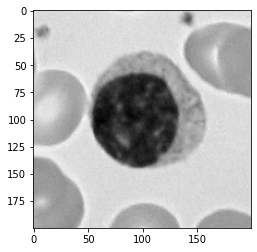

In [ ]:
plt.imshow(X[15], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(260, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((208, 40000), (52, 40000))

In [ ]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", ytrain.shape)
Y_train = np_utils.to_categorical(ytrain, n_classes)
Y_test = np_utils.to_categorical(ytest, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(xtrain, Y_train, batch_size=128, epochs=10, validation_data=(xtest, ytest))

Shape before one-hot encoding:  (208,)
Shape after one-hot encoding:  (208, 10)


TypeError: ignored